In [25]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

import DeformationModules as defmod
import Shooting as shoot
import Hamiltonian as ham
import useful_fun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
"""Dimension of the space"""
d = 2

In [71]:
σ = 0.5
nbPts = 2

Trans = defmod.TranslationsIdenticalCost(σ, d, nbPts)

In [72]:
hamiltonian = ham.Hamilt(Trans)

In [73]:
def H_r(GD, MOM):
    return hamiltonian(GD, MOM, hamiltonian.Cont_geo(GD, MOM))

In [74]:
GD_Trans = torch.tensor([[0., 0.], [0., 1.]], requires_grad=True).view(-1)
MOM_Trans = torch.tensor([[-0.5, 0.5], [0.5, 0.5]], requires_grad=True).view(-1)

In [89]:
cont = hamiltonian.Cont_geo(GD_Trans, MOM_Trans)

In [90]:
GD_final, MOM_final = shoot.shoot(Trans, GD_Trans, MOM_Trans, H_r, 10)
print(GD_final.view(-1, 2))
print(MOM_final.view(-1, 2))
print(cont.view(-1, 2))

tensor([[-0.4910,  0.5085],
        [ 0.4910,  1.5100]], grad_fn=<ViewBackward>)
tensor([[-0.5002,  0.4990],
        [ 0.5002,  0.5010]], grad_fn=<ViewBackward>)
tensor([[-0.4908,  0.5092],
        [ 0.4908,  0.5092]], grad_fn=<ViewBackward>)


In [84]:
print(shoot.shoot(Trans, GD_final, MOM_final, H_r, 5))

(tensor([-0.9910,  1.0076,  0.9910,  2.0110], grad_fn=<AddBackward0>), tensor([-0.5002,  0.4990,  0.5002,  0.5010], grad_fn=<SubBackward0>))


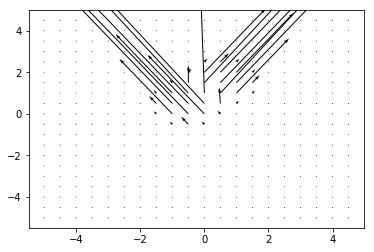

In [85]:
nx, ny = 20, 20
sx, sy = 10, 10
x, y = torch.meshgrid([torch.arange(0, nx), torch.arange(0, ny)])
x = sx*(x.type(torch.FloatTensor)/nx - 0.5)
y = sy*(y.type(torch.FloatTensor)/ny - 0.5)
"""u, v = torch.zeros([nx, ny]), torch.zeros([nx, ny])"""

u, v = useful_fun.vec2grid(Trans(GD_final, cont, useful_fun.grid2vec(x, y).type(torch.FloatTensor)), nx, ny)

plt.quiver(x.numpy(), y.numpy(), u.detach().numpy(), v.detach().numpy())